In [1]:
base_dir = "/home/sakano/data/docking/ligands"

sdf_dir_chiral = f"{base_dir}/sdf_chiral"
sdf_dir_no_chiral = f"{base_dir}/sdf_no_chiral"
sdf_dir_coconut = f"{base_dir}/sdf_coconut"

In [ ]:
import os
from rdkit import Chem
from rdkit.rdBase import DisableLog
from tqdm import tqdm

DisableLog("rdApp.info")
DisableLog("rdApp.warning")
DisableLog("rdApp.error")


def get_mols(sdf_dir):
    mols = []
    for filename in tqdm(os.listdir(sdf_dir), desc="Reading SDF files"):
        if filename.endswith(".sdf"):
            mol = Chem.SDMolSupplier(os.path.join(sdf_dir, filename))[0]
            mols.append(mol)
    return mols


mols_chiral = get_mols(sdf_dir_chiral)
mols_no_chiral = get_mols(sdf_dir_no_chiral)
mols_coconut = get_mols(sdf_dir_coconut)

print(f"Chiral mols: {len(mols_chiral)}")
print(f"No chiral mols: {len(mols_no_chiral)}")
print(f"COCONUT mols: {len(mols_coconut)}")

Reading SDF files: 100%|██████████| 9928/9928 [00:05<00:00, 1807.84it/s]

Chiral mols: 9857
No chiral mols: 9867
COCONUT mols: 9928


In [3]:
from rdkit.Chem import QED


def get_qeds(mols):
    qeds = []
    for mol in tqdm(mols, desc="Calculating QED"):
        qed = QED.qed(mol)
        qeds.append(qed)
    return qeds


qed_chiral = get_qeds(mols_chiral)
qed_no_chiral = get_qeds(mols_no_chiral)
qed_coconut = get_qeds(mols_coconut)

print(f"Chiral QED: {sum(qed_chiral) / len(qed_chiral)}")
print(f"No chiral QED: {sum(qed_no_chiral) / len(qed_no_chiral)}")
print(f"COCONUT QED: {sum(qed_coconut) / len(qed_coconut)}")

Calculating QED:   0%|          | 0/9857 [00:00<?, ?it/s]

Calculating QED: 100%|██████████| 9928/9928 [00:14<00:00, 691.99it/s]

Chiral QED: 0.36057819790572054
No chiral QED: 0.3383164096900637
COCONUT QED: 0.4070086974356044


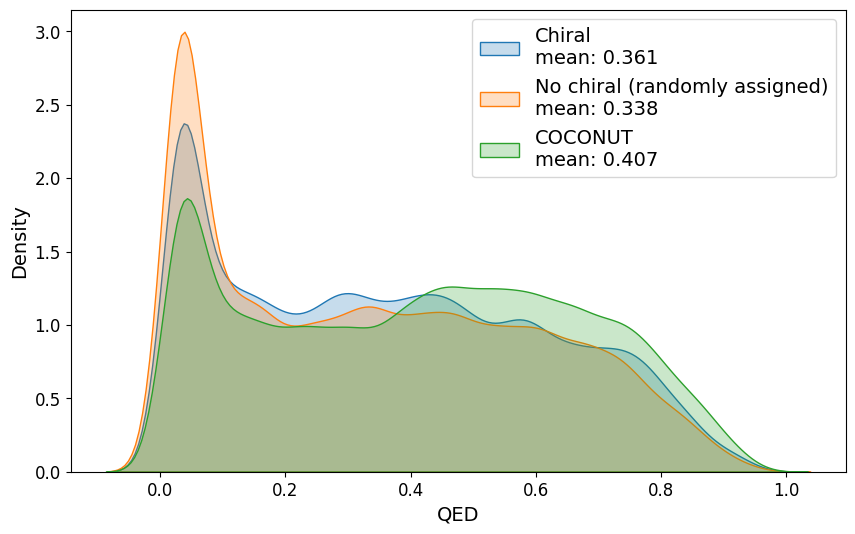

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_qed_chiral = sum(qed_chiral) / len(qed_chiral)
mean_qed_no_chiral = sum(qed_no_chiral) / len(qed_no_chiral)
mean_qed_coconut = sum(qed_coconut) / len(qed_coconut)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    qed_chiral, label=f"Chiral\nmean: {mean_qed_chiral:.3f}", bw_adjust=0.75, fill=True
)
sns.kdeplot(
    qed_no_chiral,
    label=f"No chiral (randomly assigned)\nmean: {mean_qed_no_chiral:.3f}",
    bw_adjust=0.75,
    fill=True,
)
sns.kdeplot(
    qed_coconut,
    label=f"COCONUT\nmean: {mean_qed_coconut:.3f}",
    bw_adjust=0.75,
    fill=True,
)
plt.xlabel("QED", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

Calculating MW: 100%|██████████| 9928/9928 [00:00<00:00, 370267.74it/s]


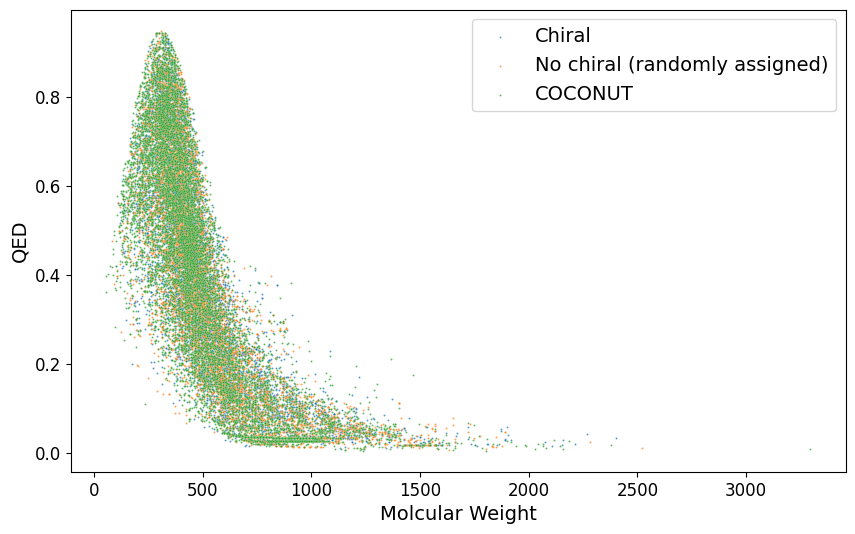

In [5]:
from rdkit.Chem import Descriptors


def get_mws(mols):
    mws = []
    for mol in tqdm(mols, desc="Calculating MW"):
        mw = Descriptors.ExactMolWt(mol)
        mws.append(mw)
    return mws


mws_chiral = get_mws(mols_chiral)
mws_no_chiral = get_mws(mols_no_chiral)
mws_coconut = get_mws(mols_coconut)

# plot MW and QED
plt.figure(figsize=(10, 6))
sns.scatterplot(
    {"MW": mws_chiral, "QED": qed_chiral},
    x="MW",
    y="QED",
    label="Chiral",
    s=2,
    alpha=0.75,
)
sns.scatterplot(
    {"MW": mws_no_chiral, "QED": qed_no_chiral},
    x="MW",
    y="QED",
    label="No chiral (randomly assigned)",
    s=2,
    alpha=0.75,
)
sns.scatterplot(
    {"MW": mws_coconut, "QED": qed_coconut},
    x="MW",
    y="QED",
    label="COCONUT",
    s=2,
    alpha=0.75,
)
plt.xlabel("Molcular Weight", fontsize=14)
plt.ylabel("QED", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

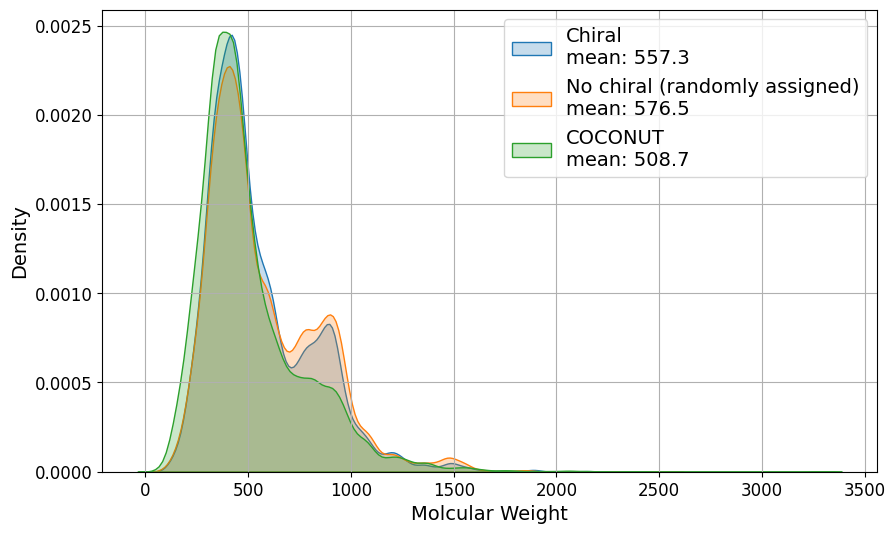

In [6]:
mean_mw_chiral = sum(mws_chiral) / len(mws_chiral)
mean_mw_no_chiral = sum(mws_no_chiral) / len(mws_no_chiral)
mean_mw_coconut = sum(mws_coconut) / len(mws_coconut)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    mws_chiral,
    label=f"Chiral\nmean: {mean_mw_chiral:.1f}",
    bw_adjust=0.75,
    fill=True,
)
sns.kdeplot(
    mws_no_chiral,
    label=f"No chiral (randomly assigned)\nmean: {mean_mw_no_chiral:.1f}",
    bw_adjust=0.75,
    fill=True,
)
sns.kdeplot(
    mws_coconut,
    label=f"COCONUT\nmean: {mean_mw_coconut:.1f}",
    bw_adjust=0.75,
    fill=True,
)
plt.xlabel("Molcular Weight", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [7]:
# 分子量 700 - 1000 のところに COCONUT にいないような分子が生成されているのでチェック
import numpy as np
from rdkit.Chem import Draw

mws_chiral = np.array(mws_chiral)
mws_no_chiral = np.array(mws_no_chiral)
mws_coconut = np.array(mws_coconut)

mws_chiral_filtered_indices = np.where((mws_chiral >= 700) & (mws_chiral <= 1000))[0]
mws_no_chiral_filtered_indices = np.where(
    (mws_no_chiral >= 700) & (mws_no_chiral <= 1000)
)[0]
mws_coconut_filtered_indices = np.where((mws_coconut >= 700) & (mws_coconut <= 1000))[0]

mols_chiral_filtered = [mols_chiral[i] for i in mws_chiral_filtered_indices]
mols_no_chiral_filtered = [mols_no_chiral[i] for i in mws_no_chiral_filtered_indices]
mols_coconut_filtered = [mols_coconut[i] for i in mws_coconut_filtered_indices]

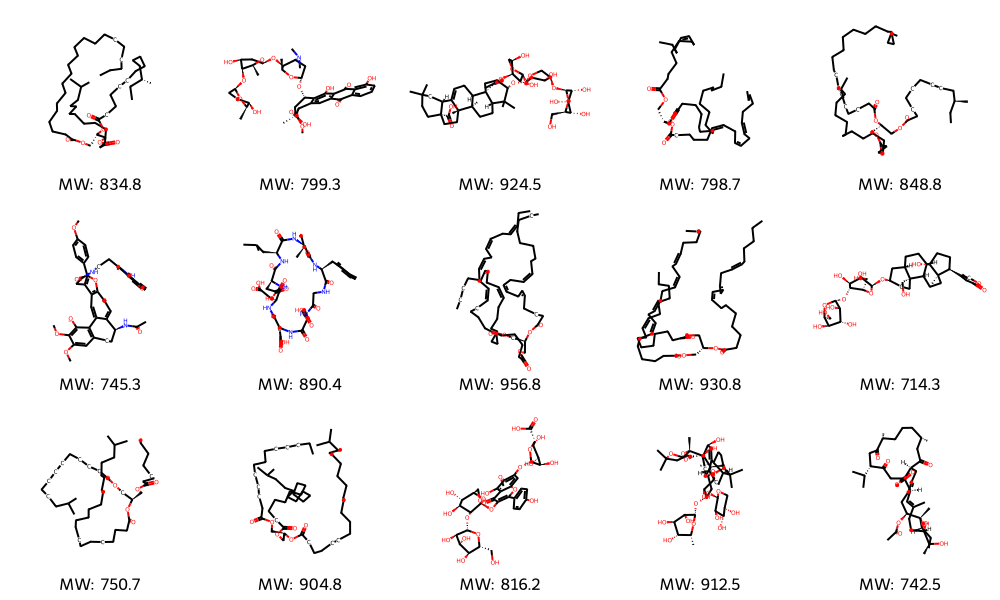

In [8]:
Draw.MolsToGridImage(
    mols_chiral_filtered[:15],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f"MW: {mw:.1f}" for mw in mws_chiral[mws_chiral_filtered_indices[:15]]],
)

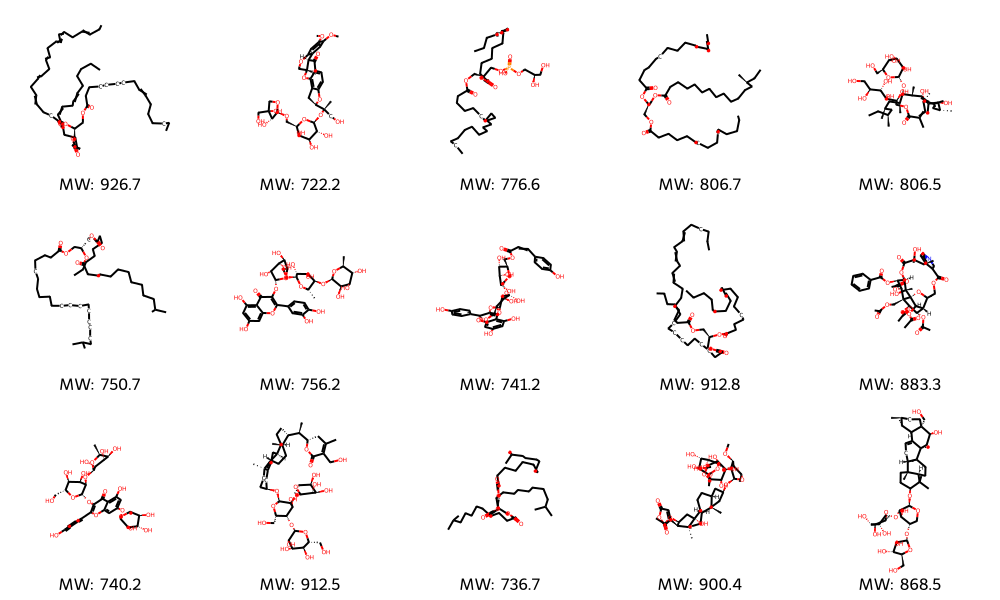

In [ ]:
Draw.MolsToGridImage(
    mols_no_chiral_filtered[:15],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[
        f"MW: {mw:.1f}" for mw in mws_no_chiral[mws_no_chiral_filtered_indices[:15]]
    ],
)

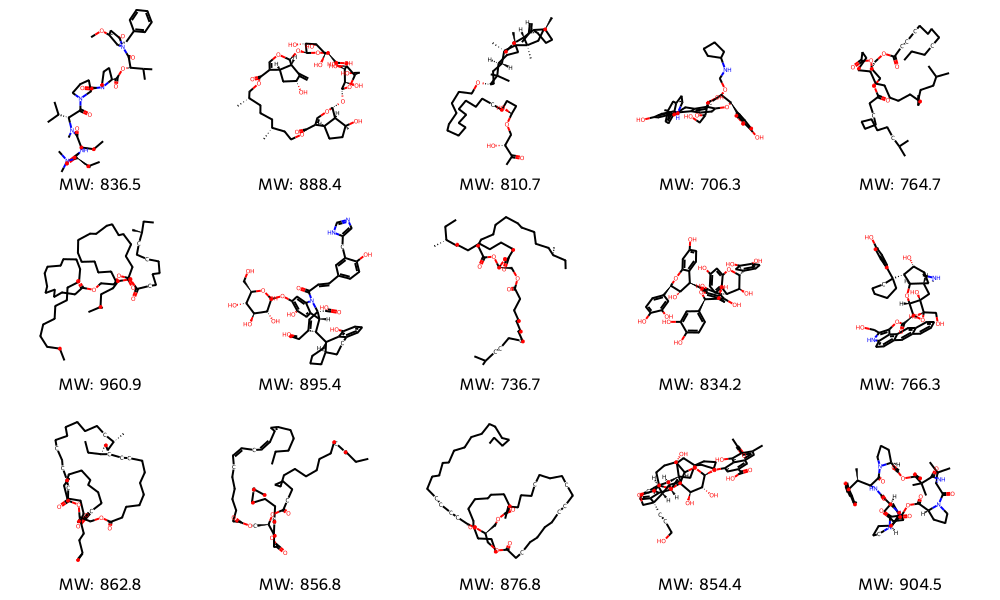

In [10]:
Draw.MolsToGridImage(
    mols_coconut_filtered[:15],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f"MW: {mw:.1f}" for mw in mws_coconut[mws_coconut_filtered_indices[:15]]],
)

In [11]:
from rdkit.Chem import rdForceFieldHelpers, Mol
from rdkit.Chem import AllChem
import pandas as pd


def get_energy(mol: Mol):
    uff = AllChem.UFFGetMoleculeForceField(mol)
    if uff is None:
        uff_energy = None
    else:
        uff_energy = uff.CalcEnergy()
    mmff_props = AllChem.MMFFGetMoleculeProperties(mol)
    mmff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props)
    if mmff is None:
        mmff_energy = None
    else:
        mmff_energy = mmff.CalcEnergy()

    return {"UFF": uff_energy, "MMFF": mmff_energy}


energies_chiral = pd.DataFrame(
    [get_energy(mol) for mol in tqdm(mols_chiral, desc="Calculating energies")]
)
energies_no_chiral = pd.DataFrame(
    [get_energy(mol) for mol in tqdm(mols_no_chiral, desc="Calculating energies")]
)
energies_coconut = pd.DataFrame(
    [get_energy(mol) for mol in tqdm(mols_coconut, desc="Calculating energies")]
)

Calculating energies:  33%|███▎      | 3204/9857 [00:04<00:08, 746.44it/s]

Calculating energies: 100%|██████████| 9928/9928 [00:13<00:00, 740.90it/s]


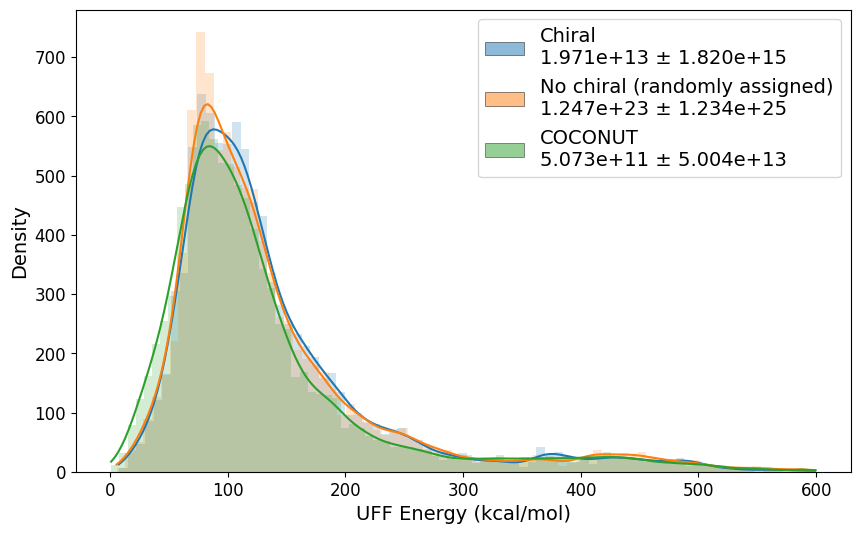

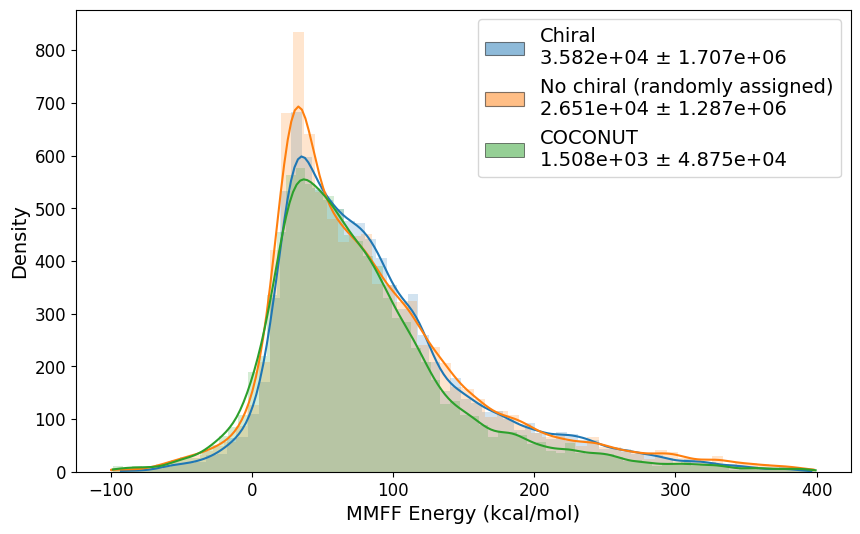

In [12]:
def plot(data_list, key, range_=(0, 600)):
    plt.figure(figsize=(10, 6))
    for data in data_list:
        df = data["DataFrame"]
        label = f"{data['Label']}\n{df[key].mean():.3e} ± {df[key].std():.3e}"
        sns.histplot(
            df[(range_[0] < df[key]) & (df[key] < range_[1])].dropna()[key],
            label=label,
            alpha=0.2,
            kde=True,
            edgecolor=(0, 0, 0, 0),
            kde_kws={"bw_adjust": 0.75},
        )
    plt.xlabel(f"{key} Energy (kcal/mol)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    leg = plt.legend(fontsize=14)
    for lh in leg.legend_handles:
        if lh is not None:
            lh.set_alpha(0.5)
    plt.show()


data_list = [
    {"DataFrame": energies_chiral, "Label": "Chiral"},
    {"DataFrame": energies_no_chiral, "Label": "No chiral (randomly assigned)"},
    {"DataFrame": energies_coconut, "Label": "COCONUT"},
]
plot(data_list, "UFF", (0, 600))
plot(data_list, "MMFF", (-100, 400))

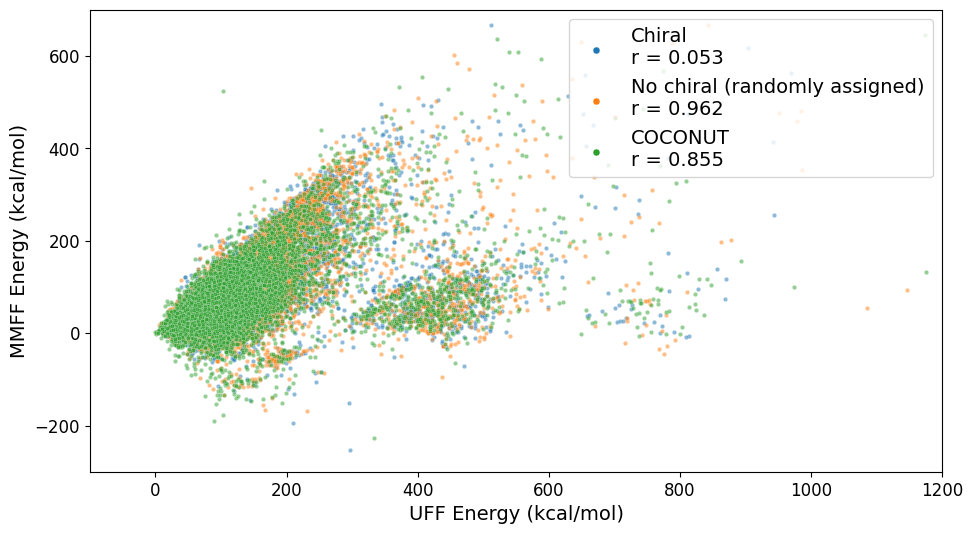

In [13]:
plt.figure(figsize=(11, 6))
for data in data_list:
    df = data["DataFrame"]
    pearson_corr = df.corr(method="pearson")["MMFF"]["UFF"]
    label = f"{data['Label']}\nr = {pearson_corr:.3f}"
    sns.scatterplot(x="UFF", y="MMFF", data=df, label=label, alpha=0.5, s=10)
plt.xlabel("UFF Energy (kcal/mol)", fontsize=14)
plt.ylabel("MMFF Energy (kcal/mol)", fontsize=14)
plt.xlim(-100, 1200)
plt.ylim(-300, 700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
leg = plt.legend(fontsize=14)
for lh in leg.legend_handles:
    if lh is not None:
        lh._sizes = [25]
        lh.set_alpha(1)
plt.show()

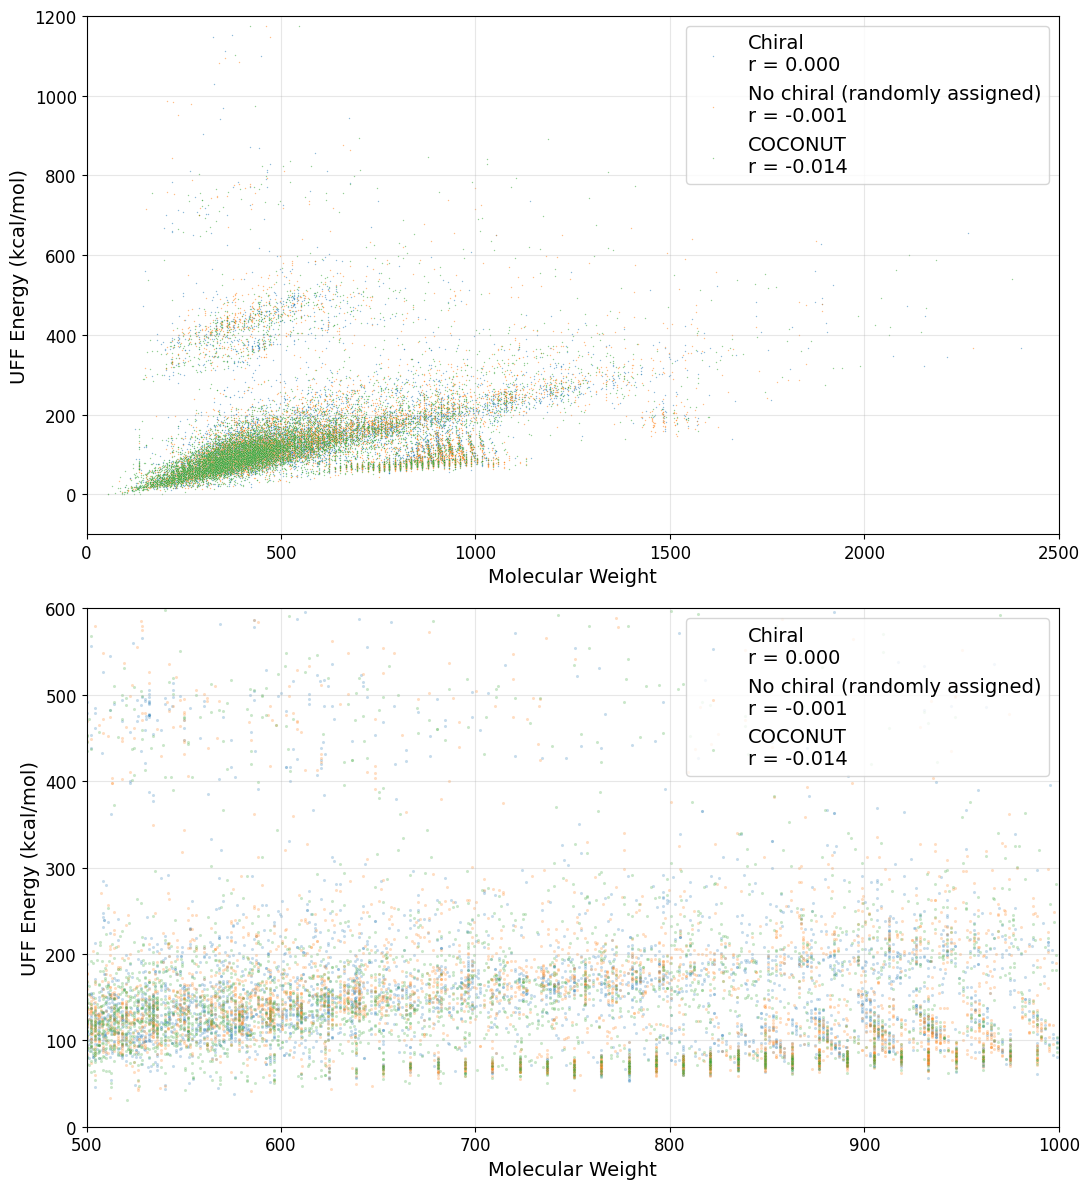

In [ ]:
# Calculate Pearson correlation between UFF energy and molecular weight
uff_mw_corr_chiral = (
    pd.DataFrame({"UFF": energies_chiral["UFF"], "MW": mws_chiral}).corr().iloc[0, 1]
)
uff_mw_corr_no_chiral = (
    pd.DataFrame({"UFF": energies_no_chiral["UFF"], "MW": mws_no_chiral})
    .corr()
    .iloc[0, 1]
)
uff_mw_corr_coconut = (
    pd.DataFrame({"UFF": energies_coconut["UFF"], "MW": mws_coconut}).corr().iloc[0, 1]
)

# サブプロットを作成
fig, axs = plt.subplots(2, 1, figsize=(11, 12), gridspec_kw={"height_ratios": [1, 1]})

# 上のプロット（全体図）
ax = axs[0]
sns.scatterplot(
    x=mws_chiral,
    y=energies_chiral["UFF"],
    label=f"Chiral\nr = {uff_mw_corr_chiral:.3f}",
    alpha=0.5,
    s=1,
    ax=ax,
)
sns.scatterplot(
    x=mws_no_chiral,
    y=energies_no_chiral["UFF"],
    label=f"No chiral (randomly assigned)\nr = {uff_mw_corr_no_chiral:.3f}",
    alpha=0.5,
    s=1,
    ax=ax,
)
sns.scatterplot(
    x=mws_coconut,
    y=energies_coconut["UFF"],
    label=f"COCONUT\nr = {uff_mw_corr_coconut:.3f}",
    alpha=0.5,
    s=1,
    ax=ax,
)

ax.set_xlabel("Molecular Weight", fontsize=14)
ax.set_ylabel("UFF Energy (kcal/mol)", fontsize=14)
ax.set_xlim(0, 2500)
ax.set_ylim(-100, 1200)
ax.tick_params(labelsize=12)
leg = ax.legend(fontsize=14)
for lh in leg.get_lines():
    if lh is not None:
        lh.set_markersize(25)
        lh.set_alpha(1)
ax.grid(alpha=0.3)

# 下のプロット（拡大図）
ax = axs[1]
sns.scatterplot(
    x=mws_chiral,
    y=energies_chiral["UFF"],
    label=f"Chiral\nr = {uff_mw_corr_chiral:.3f}",
    alpha=0.25,
    s=5,
    ax=ax,
)
sns.scatterplot(
    x=mws_no_chiral,
    y=energies_no_chiral["UFF"],
    label=f"No chiral (randomly assigned)\nr = {uff_mw_corr_no_chiral:.3f}",
    alpha=0.25,
    s=5,
    ax=ax,
)
sns.scatterplot(
    x=mws_coconut,
    y=energies_coconut["UFF"],
    label=f"COCONUT\nr = {uff_mw_corr_coconut:.3f}",
    alpha=0.25,
    s=5,
    ax=ax,
)

ax.set_xlabel("Molecular Weight", fontsize=14)
ax.set_ylabel("UFF Energy (kcal/mol)", fontsize=14)
ax.set_xlim(500, 1000)
ax.set_ylim(0, 600)
ax.tick_params(labelsize=12)
leg = ax.legend(fontsize=14)
for handle in leg.get_lines():
    if handle is not None:
        handle.set_markersize(5)
        handle.set_alpha(1)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Calculating Tanimoto similarities: 100%|██████████| 1000/1000 [00:00<00:00, 325467.84it/s]


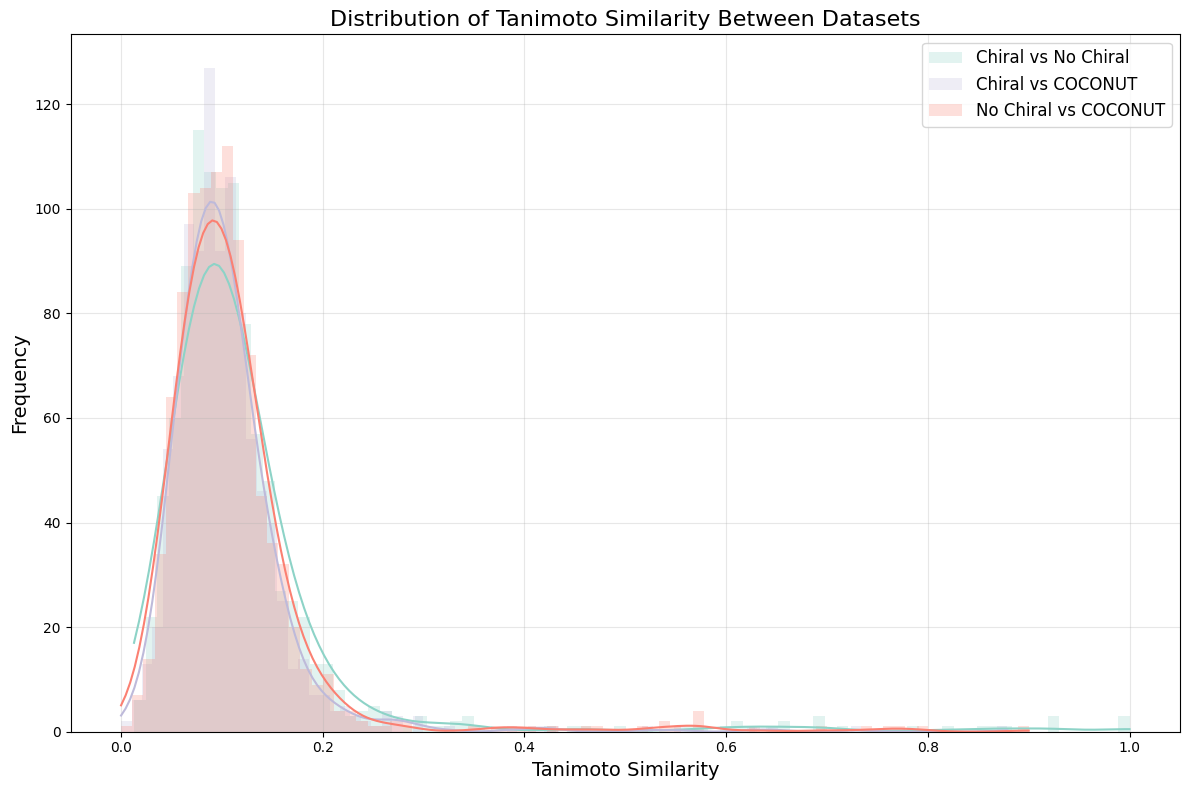

Statistical information of Tanimoto similarity:
Chiral vs No Chiral: Mean=0.1236, Median=0.1000
Chiral vs COCONUT: Mean=0.1055, Median=0.0952
No Chiral vs COCONUT: Mean=0.1117, Median=0.0976


In [17]:
# Calculation and comparison of Tanimoto coefficients
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


# Randomly sample from each dataset for comparison
def calculate_tanimoto_similarity(mols1, mols2, n_samples=1000):
    # Randomly select n_samples molecules from each dataset
    if len(mols1) > n_samples:
        mols1_sample = np.random.choice(mols1, n_samples, replace=False)
    else:
        mols1_sample = mols1

    if len(mols2) > n_samples:
        mols2_sample = np.random.choice(mols2, n_samples, replace=False)
    else:
        mols2_sample = mols2

    # Calculate fingerprints
    fps1 = [
        AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)
        for mol in tqdm(mols1_sample, desc="Calculating fingerprints for set 1")
    ]
    fps2 = [
        AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)
        for mol in tqdm(mols2_sample, desc="Calculating fingerprints for set 2")
    ]

    # Calculate Tanimoto coefficient for all pairs
    similarities = []
    for i in tqdm(
        range(min(len(fps1), len(fps2))), desc="Calculating Tanimoto similarities"
    ):
        sim = DataStructs.TanimotoSimilarity(fps1[i], fps2[i])
        similarities.append(sim)

    return similarities


# Calculate Tanimoto coefficients between datasets
tanimoto_chiral_no_chiral = calculate_tanimoto_similarity(mols_chiral, mols_no_chiral)
tanimoto_chiral_coconut = calculate_tanimoto_similarity(mols_chiral, mols_coconut)
tanimoto_no_chiral_coconut = calculate_tanimoto_similarity(mols_no_chiral, mols_coconut)

# Set a custom color palette
# custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green
# Alternative palettes:
# custom_palette = sns.color_palette("Set1", 3)
# custom_palette = sns.color_palette("viridis", 3)
custom_palette = ["#8dd3c7", "#bebada", "#fb8072"]

# Visualize results
plt.figure(figsize=(12, 8))
sns.histplot(
    tanimoto_chiral_no_chiral,
    kde=True,
    label="Chiral vs No Chiral",
    alpha=0.25,
    color=custom_palette[0],
    edgecolor=None,
)
sns.histplot(
    tanimoto_chiral_coconut,
    kde=True,
    label="Chiral vs COCONUT",
    alpha=0.25,
    color=custom_palette[1],
    edgecolor=None,
)
sns.histplot(
    tanimoto_no_chiral_coconut,
    kde=True,
    label="No Chiral vs COCONUT",
    alpha=0.25,
    color=custom_palette[2],
    edgecolor=None,
)

plt.xlabel("Tanimoto Similarity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Tanimoto Similarity Between Datasets", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistical information
print("Statistical information of Tanimoto similarity:")
print(
    f"Chiral vs No Chiral: Mean={np.mean(tanimoto_chiral_no_chiral):.4f}, Median={np.median(tanimoto_chiral_no_chiral):.4f}"
)
print(
    f"Chiral vs COCONUT: Mean={np.mean(tanimoto_chiral_coconut):.4f}, Median={np.median(tanimoto_chiral_coconut):.4f}"
)
print(
    f"No Chiral vs COCONUT: Mean={np.mean(tanimoto_no_chiral_coconut):.4f}, Median={np.median(tanimoto_no_chiral_coconut):.4f}"
)